# introduction to `qibo`

### Introduction

During this course we are going to use `Qibo`, an open source framework for quantum computing. It provides us with an high level language which can be used to implement algorithms with both circuit-based and adiabatic computation approaches and, once the code is set up, it can be easily executed on various engines, including both classical and quantum hardware.

For more info about the whole framework one can have a look to the [`qibo` webpage](https://qibo.science/).

### Setup
We start installing `qibo` and then importing some useful primitives.

In [ ]:
# Installation process for needed libraries
!pip install qibo
!pip install qibojit
!pip install git+https://github.com/qiboteam/qiboedu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-tbiq71pc
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-tbiq71pc
  Resolved https://github.com/qiboteam/qiboedu to commit 5de265148000f4e13217a16b535d14ca0b7e3d4a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━

A crucial step is the backend choice. In qibo four backends are provided, and can be used for different kind of applications.

Since we want to do simulation here, we set the `qibojit` backend, which is the most suitable one if we want to run simulation with many qubits.

In [ ]:
import numpy as np
import qibo
from qibo import Circuit, gates, hamiltonians

In [ ]:
# Setting desired backend
qibo.set_backend(backend="qibojit", platform="numba")

[Qibo 0.2.7|INFO|2024-04-09 23:40:37]: Using qibojit (numba) backend on /CPU:0
INFO:qibo.config:Using qibojit (numba) backend on /CPU:0


In [ ]:
# With qibojit, we can specify the number of classical threads to be used
qibo.get_threads()

2

### Build my first `qibo` circuit

Now we are ready to code our first quantum circuit using `qibo`.

In [ ]:
# Number of qubits
nqubits = 4

# Initialize the circuit using the Circuit class
c = Circuit(nqubits=nqubits)

print(c.draw())

q0: ─
q1: ─
q2: ─
q3: ─


Secondly, we add some gates to the circuit. A more detailed list of all the available gates can be found in the [`qibo` documentation](https://qibo.science/qibo/stable/api-reference/qibo.html#gates).

In [ ]:
# hadamards gate
c.add(gates.H(q=0))
c.add(gates.H(q=1))

# pauli`s gate
c.add(gates.Z(q=3))
c.add(gates.X(q=0))

# Controlled gates
c.add(gates.CNOT(q0=0, q1=2))
c.add(gates.CZ(q0=2, q1=1))

# one can use more than one qubit to control the action of a gate on a target qubit
c.add(gates.Y(q=1).controlled_by(2, 3, 0))



Once the circuit is completed, we can print some summary information.

In [ ]:
print(c.summary())

Circuit depth = 5
Total number of gates = 7
Number of qubits = 4
Most common gates:
h: 2
z: 1
x: 1
cx: 1
cz: 1
y: 1


In [ ]:
print(c.draw())

q0: ─H─X─o───o─
q1: ─H───|─Z─Y─
q2: ─────X─o─o─
q3: ─Z───────o─


At this point we already can execute the circuit.
Note that, since we are playing with `nqubits = 4`, the final state will be a possible superposition of all the 4-bits combinations. We wrote a function in `scripts.utils` which can be used to create the list of all the possible bitstrings given the number of qubits:

In [ ]:
# utils functions
from qiboedu.scripts.utils import generate_bitstring_combinations

# one of them is to generate bitstream combinations
bitstrings = generate_bitstring_combinations(n=nqubits)

#print bitstrings
print(bitstrings)

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


Let's execute the circuit and verify which is the final state we get after the execution.

In [ ]:
# execute the circuit
print(c())

(0.5+0j)|0000> + (0.5+0j)|0100> + (0.5+0j)|1010> + (-0.5+0j)|1110>


In [ ]:
# print the final state
print(c().state())

outcome = c()

[ 0.5+0.j -0. +0.j  0. +0.j -0. +0.j  0.5+0.j -0. +0.j -0. +0.j  0. -0.j
  0. +0.j -0. +0.j  0.5+0.j -0. +0.j  0. +0.j -0. +0.j -0.5+0.j -0. +0.j]


In this simple case we defined a circuit without adding measurement gates. What we get as result of such an execution is the exact state vector simulation of the final state.

Since we simulated the exact final state, we can also have access to the final amplitudes, and so to the probabilities of collect some of the states corresponding to the list of bitstrings.

In [ ]:
# print probabilities from outcome
probs = outcome.probabilities()
print(probs)

[0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.25 0.   0.   0.
 0.25 0.  ]


We can visualize them together with the bitstrings

In [ ]:
# print each bitstring side by side with its probability value
for i in range(len(bitstrings)):
  print(f"Prob of state {bitstrings[i]} = {probs[i]}")

Prob of state 0000 = 0.2499999999999999
Prob of state 0001 = 0.0
Prob of state 0010 = 0.0
Prob of state 0011 = 0.0
Prob of state 0100 = 0.2499999999999999
Prob of state 0101 = 0.0
Prob of state 0110 = 0.0
Prob of state 0111 = 0.0
Prob of state 1000 = 0.0
Prob of state 1001 = 0.0
Prob of state 1010 = 0.2499999999999999
Prob of state 1011 = 0.0
Prob of state 1100 = 0.0
Prob of state 1101 = 0.0
Prob of state 1110 = 0.2499999999999999
Prob of state 1111 = 0.0


#### Add measurements gates
We can, instead, add measurements gates in the end of the circuit, if we want to simulate a more realistic scenario affected by shot-noise.

With shot-noise we mean the natural variance of quantum system, due to the fact that we need to measure the final state after applying the gates. In a realistic scenario we need to repeat the circuit execution many times and use the collected results to calculate an estimation of the probabilities.

In [ ]:
# we initialise the same circuit using the Circuit class
c = Circuit(nqubits)

# same gates again
c.add(gates.H(q=0))
c.add(gates.H(q=1))
c.add(gates.Z(q=3))
c.add(gates.X(q=0))
c.add(gates.CNOT(q0=0, q1=2))
c.add(gates.CZ(q0=2, q1=1))
c.add(gates.Y(q=1).controlled_by(2, 3, 0))

# we also add measurements gates
c.add(gates.M(*range(nqubits)))

# print the new face of the circuit
print(c.draw())


q0: ─H─X─o───o─M─
q1: ─H───|─Z─Y─M─
q2: ─────X─o─o─M─
q3: ─Z───────o─M─


Again, we can execute the circuit and collect the outcome.

At this time, we also specify a number of shots.

In [ ]:
# collect the outcome after setting a number of circuit shots
outcome = c(nshots=1000)

print(outcome)

(0.5+0j)|0000> + (0.5+0j)|0100> + (0.5+0j)|1010> + (-0.5+0j)|1110>


We can still collect the exact probabilities

In [ ]:
# for all the qubits
outcome.probabilities()

array([0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.25, 0.  ])

In [ ]:
# we can also check the outcome for a specific qubit of the system
outcome.probabilities(qubits=[0, 3])

array([0.5, 0. , 0.5, 0. ])

We can also collect frequencies

In [ ]:
# therefore, we can collect frequencies
# set binary=True if you want the amplitude binary notation
frequencies = outcome.frequencies()
print(frequencies)

Counter({'1110': 272, '0000': 256, '0100': 246, '1010': 226})


#### State visualization
We can use the `scripts.plotscripts.visualize_state` function, which takes as an argument the counter object you get calling `circuit(nshots=nshots).frequencies(binary=True)`.

In [ ]:
# let's import the plotting function
from qiboedu.scripts.plotscripts import visualize_states

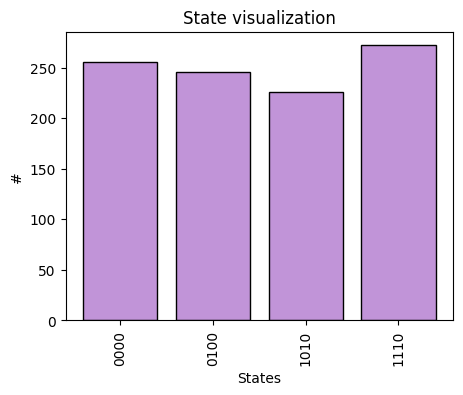

In [ ]:
# we collect the counter object containing the frequencies
frequencies = outcome.frequencies(binary=True)

# calling the plotting function
visualize_states(frequencies)

#### Combining circuits into a single circuit

It is possible to sum together two or more circuits (with the same number of qubits) into one.

In [ ]:
# initialize c1
c1 = Circuit(3)
c1.add(gates.H(0))
c1.add(gates.CNOT(q0=1, q1=0))
c1.add(gates.Z(1))

print(c1.draw(), "\n")

# initialize c2
c2 = Circuit(3)
c2.add(gates.H(2))
c2.add(gates.Z(1))
c2.add(gates.Y(1))
c2.add(gates.CZ(2, 1))

print(c2.draw(), "\n")

# combine them into a single circuit
c3 = c1 + c2

# print the final circuit
print(c3.draw())


q0: ─H─X───
q1: ───o─Z─
q2: ─────── 

q0: ───────
q1: ─Z─Y─Z─
q2: ─H───o─ 

q0: ─H─X─────────
q1: ───o─Z─Z─Y─Z─
q2: ─────H─────o─


#### Let's simulate some entanglement

We can simulate the smallest entangling system in order to reproduce one of the Bell's states

$$ |b_1\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} \\ $$

To do this, we need to create a two-qubit circuit, lead one of the two qubits to a superposed state using an Hadamard gate and then apply a controlled-NOT gate to the second qubit using the superposed one as control.

In [ ]:
# two qubits ciruit to simulate the first Bell's state
c = Circuit(2)
c.add(gates.H(0))
c.add(gates.CNOT(q0=0, q1=1))
c.add(gates.M(0, 1))

print(c())

(0.70711+0j)|00> + (0.70711+0j)|11>


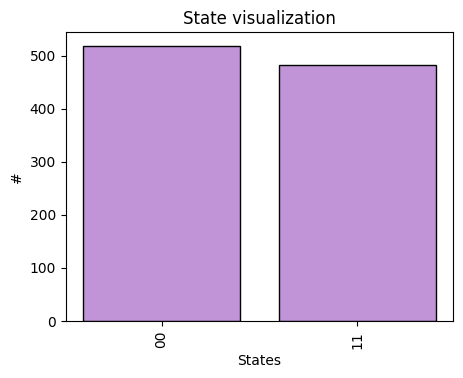

In [ ]:
# collect outcome and frequencies
frequencies = c(nshots=1000).frequencies()

visualize_states(frequencies)



   Exercise implement the quantum circuits needed to prepare the other three Bell's states: $$ |b_2\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}},\qquad |b_3\rangle = \frac{|10\rangle + |01\rangle}{\sqrt{2}},\qquad |b_4\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}} \\ $$

### Parametrized gates

We can use parametric gates to manipulate the quantum state with some more freedom.

The most commonly used parametric gates are rotations $R_k(\theta) = \exp [ -i \theta \sigma_k ] $, where $\sigma_k$ is one of the components of the Pauli's vector: $\vec{\sigma}=(I, \sigma_x, \sigma_y, \sigma_z)$.

In [ ]:
# A fancier quantum circuit composed of rotations and with a layered architecture
nqubits = 2
nlayers = 2

c = Circuit(nqubits)

for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0))
  c.add(gates.CNOT(q0=0, q1=1))

c.add(gates.M(*range(nqubits)))

print(c.draw())

q0: ─RY─RZ─o─RY─RZ─o─M─
q1: ─RY─RZ─X─RY─RZ─X─M─


All the rotational angles are now set to zero, and the final state is equal to the initial state (which is $|0\rangle^{\otimes N}$ by default). We can play with the angles to modify the final state.

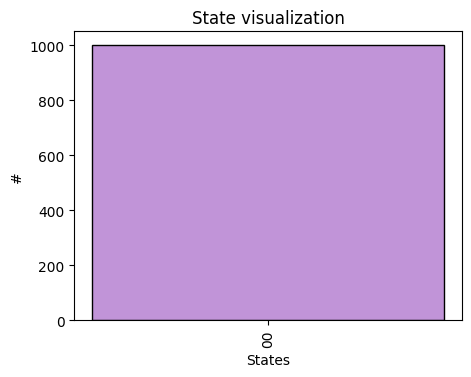

In [ ]:
# executing the circuit and collecting the frequencies
outcome = c(nshots=1000)
freq = outcome.frequencies()

visualize_states(freq)

In [ ]:
# visualize the current parameters (angles)
params = c.get_parameters()
nparams = len(params)

print(params)

[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]


In [ ]:
# we will generate new arameters randomly
np.random.seed(42)
angles = np.random.randn(nparams)

print(angles)

# setting the new parameters into the circuit
c.set_parameters(angles)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473]


In [ ]:
# visualize the new parameters
c.get_parameters()

[(0.4967141530112327,),
 (-0.13826430117118466,),
 (0.6476885381006925,),
 (1.5230298564080254,),
 (-0.23415337472333597,),
 (-0.23413695694918055,),
 (1.5792128155073915,),
 (0.7674347291529088,)]

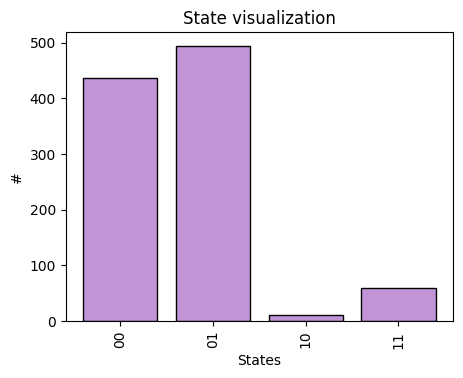

In [ ]:
# executing, collecting the frequencies and visualizing the new states
outcome = c(nshots=1000)
freq = outcome.frequencies()

visualize_states(freq)

### Hamiltonians

As final introductory step, let's see how to define and use an hamiltonian in Qibo.
We store a set of precomputed hamiltonians, which can be called and used to compute expectation values on the states we manipulate using circuits.

As a simple example, let's consider the following

In [ ]:
# defining an hamiltonian
h = hamiltonians.TFIM(2)

# visualize its matrix form
matrix = h.matrix
print(matrix)

# some properties: eigenvalues, eigenvectors, ground state
print(h.eigenvalues(),"\n")
print(h.eigenvectors(),"\n")
print(h.ground_state())

[[-2.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j  2.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j  2.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -2.-0.j]]
[-2. -2.  2.  2.] 

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]] 

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


We can calculate the expectation value of an hamiltonian over a target state.
We are going to use the final state $|\psi\rangle$ we obtain by executing the above circuit composted of rotations.

In [ ]:
# compute the expectation <psi | H | psi>
state = c().state()
h.expectation(state)

0.06941692176323623